In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [ ]:
data = {
    'Age': [19, 35, 26, 27, 19, 48, 52, 27, 32, 25, 35, 26, 45, 46, 48, 47, 45, 46],
    'Salary': [19000, 20000, 43000, 57000, 76000, 29000, 150000, 84000, 150000, 33000, 65000, 80000, 22000, 28000, 29000, 49000, 90000, 88000],
    'Purchased': [0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)
df

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
5,48,29000,1
6,52,150000,1
7,27,84000,0
8,32,150000,1
9,25,33000,0


In [5]:
X = df[['Age', 'Salary']]
y = df['Purchased']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LogisticRegression

In [7]:
# 3. Train the  
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

accurcy = accuracy_score(y_test, prediction)
print(f"Accuracy score of our model {accurcy*100:.2f}%")

Accuracy score of our model 75.00%


In [8]:
new_customer = pd.DataFrame([[45, 60000]], columns=['Age', 'Salary'])
result =  model.predict(new_customer)
if result[0] == 1:
    print("Prediction: YES, they will buy.")
else:
    print("Prediction: NO, save your ad money.")    


Prediction: YES, they will buy.


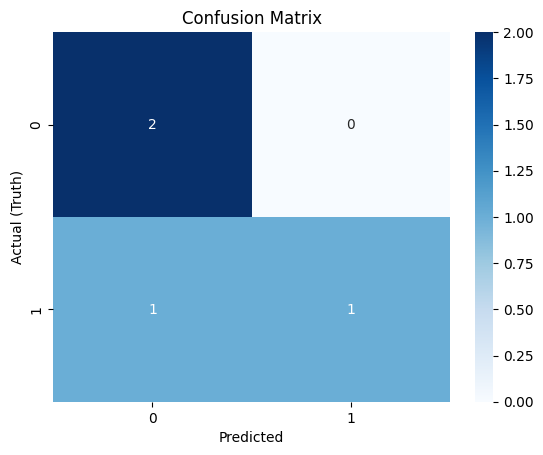

In [9]:
cm = confusion_matrix(y_test, prediction )
plt.Figure(figsize=(6,7))
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues' )
plt.xlabel('Predicted')
plt.ylabel('Actual (Truth)')
plt.title('Confusion Matrix')
plt.show()

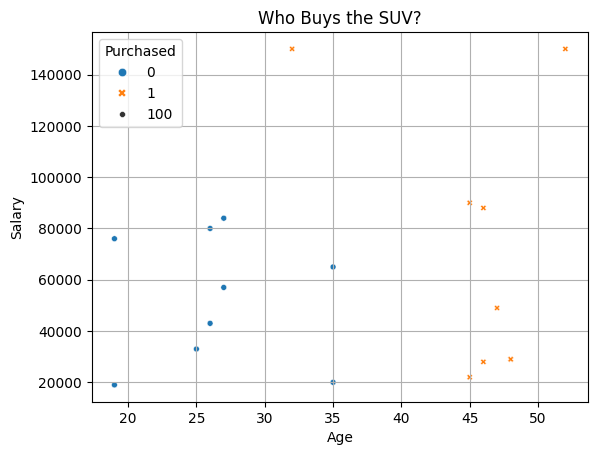

In [10]:
# 2. Visualize the Classes
plt.Figure(figsize=(8,6))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Purchased', style='Purchased', size=100)
plt.grid(True)
plt.title("Who Buys the SUV?")
plt.show()

## KNeighborsClassifier

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [12]:
X = df[['Age', 'Salary']]
y = df['Purchased']


In [13]:

# 2. Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# 3. Scale the Features (The Fix)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Learn math from Train & Transform
X_test_scaled = scaler.transform(X_test)       # Just Transform Test (don't relearn)


In [15]:
# 4. Train KNN on SCALED data
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(X_train_scaled, y_train)


,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",5
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [16]:

# 5. Predict on SCALED data
prediction = model.predict(X_test_scaled)


In [17]:
# 6. Evaluate
accuracy = accuracy_score(y_test, prediction)
cm = confusion_matrix(y_test, prediction)

print(f"KNN Accuracy (Scaled): {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(cm)

KNN Accuracy (Scaled): 75.00%
Confusion Matrix:
[[1 1]
 [0 2]]
